## performing Linear Regression

In [19]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')


In [20]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [21]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
label = le.fit_transform(df['Gender'])
label

array([1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1])

In [25]:
df.drop("Gender", axis=1, inplace=True)
 
df["Gender"] = label
 
df

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender
0,1,19,15,39,1
1,2,21,15,81,1
2,3,20,16,6,0
3,4,23,16,77,0
4,5,31,17,40,0
...,...,...,...,...,...
195,196,35,120,79,0
196,197,45,126,28,0
197,198,32,126,74,1
198,199,32,137,18,1


In [27]:
X = df[['Gender','Age',	'Annual Income (k$)']]

X.head()

,Gender,Age,Annual Income (k$)
0,1,19,15
1,1,21,15
2,0,20,16
3,0,23,16
4,0,31,17


In [28]:
y = df['Spending Score (1-100)']
y.sample()

97    50
Name: Spending Score (1-100), dtype: int64

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [46]:
y_pred  = model.predict(X_test)
y_pred


array([59.82812944, 58.84945709, 37.0469889 , 54.91842692, 39.84329514,
       64.23552817, 55.67685009, 51.87565203, 46.07289703, 59.89547225,
       49.20969012, 48.94060312, 55.3180862 , 61.29134074, 45.59726863,
       59.57252226, 44.29084909, 50.23765619, 34.22423523, 62.12139172,
       62.15314859, 52.45877845, 56.11689254, 51.61981691, 62.70931536,
       32.02956041, 62.46718801, 34.51159927, 57.44975951, 61.0850273 ,
       55.29067064, 41.37333704, 45.39021502, 58.32910423, 49.62711422,
       45.23776457, 58.78719575, 55.82495924, 45.88868971, 48.35702079])

In [48]:

model.score(X_test,y_pred)

1.0

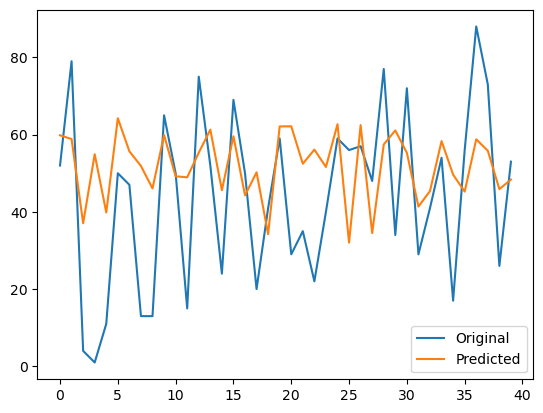

In [51]:

plt.plot(range(len(X_test)),y_test, label = 'Original')
plt.plot(range(len(X_test)),y_pred, label = 'Predicted')
plt.legend()


plt.show()

## OLS Model

In [52]:
import statsmodels.api as sm

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender
0,1,19,15,39,1
1,2,21,15,81,1
2,3,20,16,6,0
3,4,23,16,77,0
4,5,31,17,40,0
...,...,...,...,...,...
195,196,35,120,79,0
196,197,45,126,28,0
197,198,32,126,74,1
198,199,32,137,18,1


In [66]:
ss = df['Spending Score (1-100)'].sort_values(ascending=True)

In [53]:
model = sm.OLS(y,X).fit()
model

In [54]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                  
===========================================================================================
Dep. Variable:     Spending Score (1-100)   R-squared (uncentered):                   0.697
Model:                                OLS   Adj. R-squared (uncentered):              0.692
Method:                     Least Squares   F-statistic:                              150.9
Date:                    Fri, 12 Jul 2024   Prob (F-statistic):                    8.42e-51
Time:                            17:40:42   Log-Likelihood:                         -971.03
No. Observations:                     200   AIC:                                      1948.
Df Residuals:                         197   BIC:                                      1958.
Df Model:                               3                                                  
Covariance Type:                nonrobust                                                  
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Gender                 3.9629      4.422      0.896      0.371      -4.758      12.684
Age                    0.4089      0.109      3.735      0.000       0.193       0.625
Annual Income (k$)     0.4543      0.067      6.735      0.000       0.321       0.587
==============================================================================
Omnibus:                        1.622   Durbin-Watson:                   3.090
Prob(Omnibus):                  0.444   Jarque-Bera (JB):                1.482
Skew:                          -0.092   Prob(JB):                        0.477
Kurtosis:                       2.620   Cond. No.                         151.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [55]:
model.params

Gender                3.962896
Age                   0.408877
Annual Income (k$)    0.454341
dtype: float64